# Demo notebook for accessing FIA data on Azure

This notebook provides an example of accessing FIA data from blob storage on Azure. The data is stored in a collection of Parquet datasets.

FIA data are stored in the XYZ data center, so this notebook will run most efficiently on Azure compute located in XYZ. We recommend that substantial computation depending on MODIS data also be situated in XYZ. If you are using FIA data for environmental science applications, consider applying for an AI for Earth grant to support your compute requirements.

#### Imports and environment

In [1]:
import dask.dataframe as dd

from adlfs import AzureBlobFileSystem

#### Listing the data files

The full set of FIA data tables are available (e.g. tree, plot, condition).

We can use `adlfs` to list the files:

In [2]:
fs = AzureBlobFileSystem(account_name='carbonplan')

region = 'conus'  # conus or ak

fs.glob(f'carbonplan-data/raw/fia/*parquet')

['carbonplan-data/raw/fia/boundary.parquet',
 'carbonplan-data/raw/fia/cond.parquet',
 'carbonplan-data/raw/fia/cond_dwm_calc.parquet',
 'carbonplan-data/raw/fia/county.parquet',
 'carbonplan-data/raw/fia/dwm_coarse_woody_debris.parquet',
 'carbonplan-data/raw/fia/dwm_duff_litter_fuel.parquet',
 'carbonplan-data/raw/fia/dwm_fine_woody_debris.parquet',
 'carbonplan-data/raw/fia/dwm_microplot_fuel.parquet',
 'carbonplan-data/raw/fia/dwm_residual_pile.parquet',
 'carbonplan-data/raw/fia/dwm_transect_segment.parquet',
 'carbonplan-data/raw/fia/dwm_visit.parquet',
 'carbonplan-data/raw/fia/grnd_cvr.parquet',
 'carbonplan-data/raw/fia/invasive_subplot_spp.parquet',
 'carbonplan-data/raw/fia/lichen_lab.parquet',
 'carbonplan-data/raw/fia/lichen_plot_summary.parquet',
 'carbonplan-data/raw/fia/lichen_visit.parquet',
 'carbonplan-data/raw/fia/ozone_biosite_summary.parquet',
 'carbonplan-data/raw/fia/ozone_plot.parquet',
 'carbonplan-data/raw/fia/ozone_plot_summary.parquet',
 'carbonplan-data/ra

#### Opening one data file

Here we demonstrate how to open the `condition` dataset:

In [3]:
df = dd.read_parquet('az://carbonplan-data/raw/fia/cond.parquet', storage_options={'account_name': 'carbonplan'}).compute()
df.head()

CN           PLT_CN  INVYR  STATECD  UNITCD  COUNTYCD  PLOT  \
0  257087026010854  236617010010854   2011        1       1         3   215   
1  258624640010854  236617012010854   2011        1       1         3    42   
2  256996505010854  236617014010854   2011        1       6        89    83   
3  256996506010854  236617014010854   2011        1       6        89    83   
4  256996507010854  236617014010854   2011        1       6        89    83   

   CONDID  COND_STATUS_CD  COND_NONSAMPLE_REASN_CD  ...  TRTOPCD  TRTYR1_P2A  \
0       1               4                      NaN  ...      NaN         NaN   
1       1               2                      NaN  ...      NaN         NaN   
2       1               1                      NaN  ...      NaN         NaN   
3       2               3                      NaN  ...      NaN         NaN   
4       3               1                      NaN  ...      NaN         NaN   

   TRTYR2_P2A  TRTYR3_P2A  LAND_COVER_CLASS_CD  SIEQN_REF_CD  SICOND_FVS  \
0         NaN         NaN                  NaN           NaN         NaN   
1         NaN         NaN                  NaN           NaN         NaN   
2         NaN         NaN                  NaN           NaN       103.0   
3         NaN         NaN                  NaN           NaN         NaN   
4         NaN         NaN                  NaN           NaN       103.0   

   SIBASE_FVS  SISP_FVS  SIEQN_REF_CD_FVS  
0         NaN       NaN              None  
1         NaN       NaN              None  
2        50.0     621.0            LITU07  
3         NaN       NaN              None  
4        50.0     621.0            LITU07  

[5 rows x 156 columns]

#### A quick plot

Here we make a quick plot comparing the stand age to the alive basal area.

(0.0, 100.0)

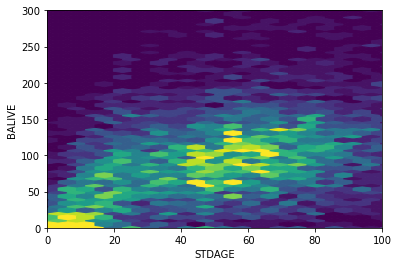

In [4]:
ax = df[::100].plot.hexbin('STDAGE', 'BALIVE', gridsize=(300, 100), vmax=20, cmap="viridis", colorbar=False)
ax.set_ylim(0, 300)
ax.set_xlim(0, 100)